Xiyao Xu

06/18/2024


Part3

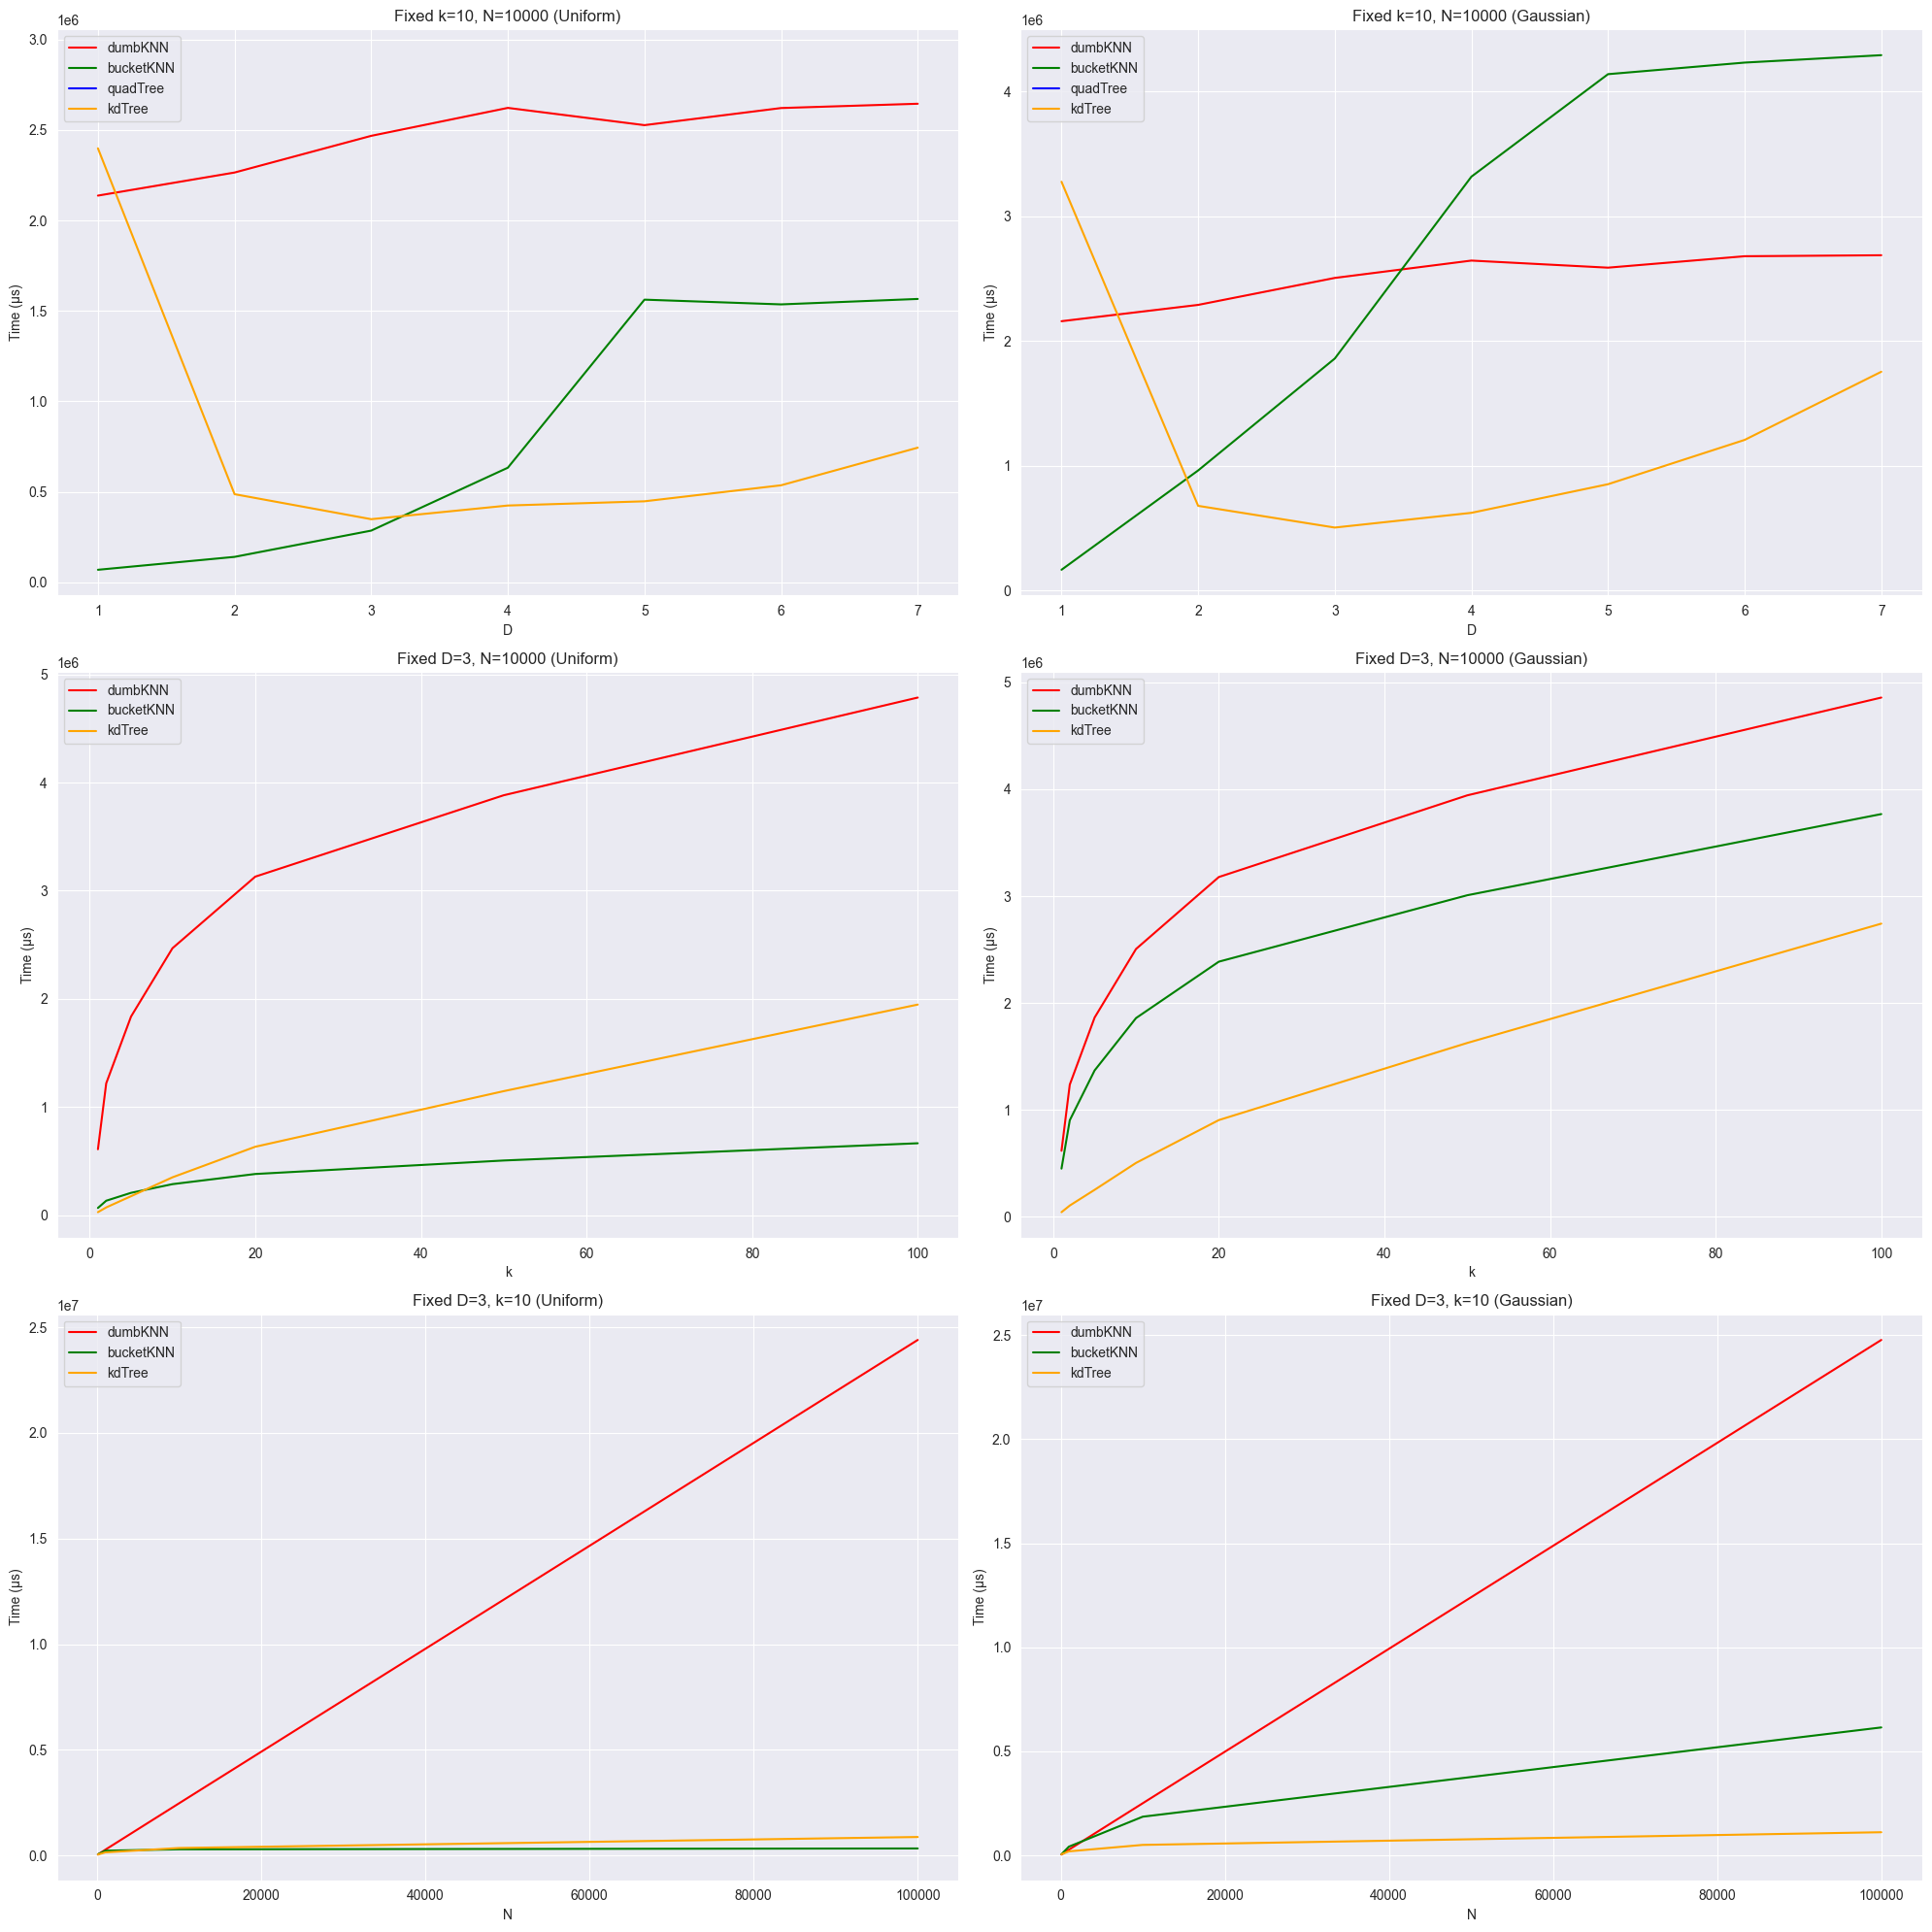

Regression Analysis:

Data Structure: dumbKNN
Time = 81969.64 * D + 2141276.14
Time = 36425.03 * k + 1582774.05
Time = -7.18e-05 * N^2 + 2.52e+02 * N

Data Structure: bucketKNN
Time = 305644.18 * D + -395053.86
Time = 5429.58 * k + 173674.84
Time = -1.76e-04 * N^2 + 1.97e+01 * N

Data Structure: quadTree
Time = 0.00 * D + 2913303.00
Insufficient data for regression analysis on k.
Insufficient data for regression analysis on N.

Data Structure: kdTree
Time = -170236.11 * D + 1450418.14
Time = 19098.26 * k + 107545.09
Time = -4.07e-04 * N^2 + 5.57e+01 * N


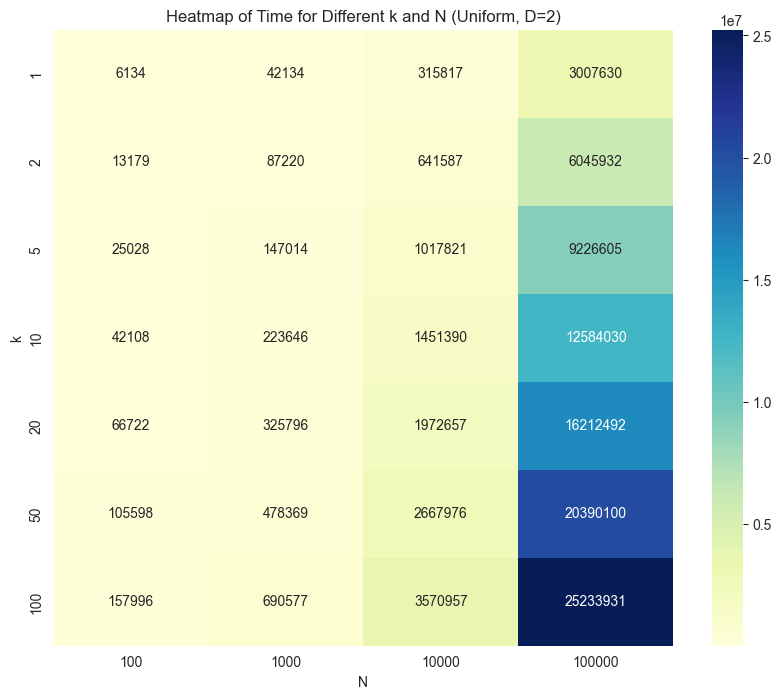

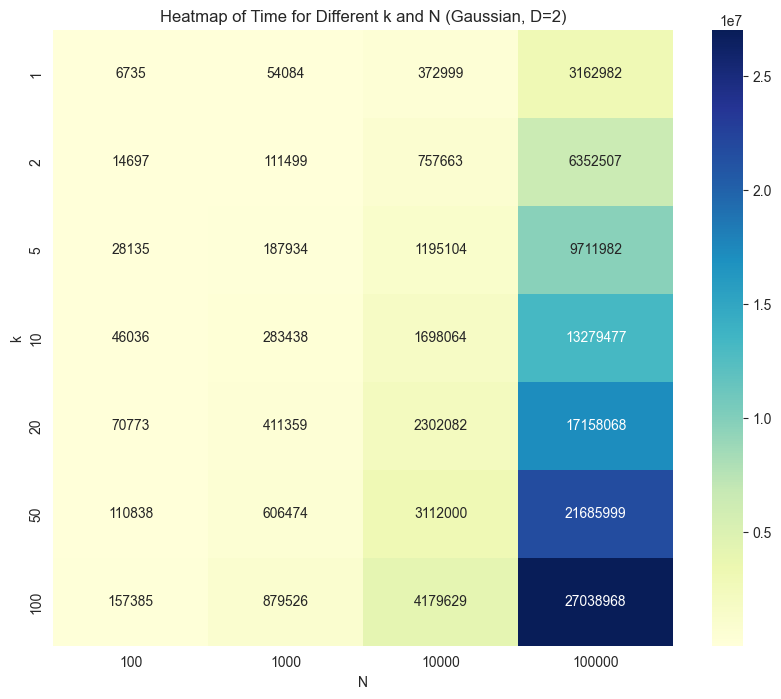

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 加载CSV数据
uniform_data = pd.read_csv('uniform_output.csv')
gaussian_data = pd.read_csv('gaussian_output.csv')

# 定义数据结构列表和颜色映射
structures = ['dumbKNN', 'bucketKNN', 'quadTree', 'kdTree']
color_map = {'dumbKNN': 'red', 'bucketKNN': 'green', 'quadTree': 'blue', 'kdTree': 'orange'}

# 创建图形
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# 对每个数据集进行分析
for i, data in enumerate([uniform_data, gaussian_data]):

    # 固定k和N,变化D
    for struct in structures:
        sub_data = data[(data['data_structure'] == struct) & (data['k'] == 10) & (data['N'] == 10000)]
        if not sub_data.empty:
            axs[0, i].plot(sub_data['D'], sub_data['time'], label=struct, color=color_map[struct])
    axs[0, i].set_xlabel('D')
    axs[0, i].set_ylabel('Time (µs)')
    axs[0, i].set_title(f'Fixed k=10, N=10000 ({["Uniform", "Gaussian"][i]})')
    axs[0, i].legend()

    # 固定D和N,变化k
    for struct in structures:
        sub_data = data[(data['data_structure'] == struct) & (data['D'] == 3) & (data['N'] == 10000)]
        if not sub_data.empty:
            axs[1, i].plot(sub_data['k'], sub_data['time'], label=struct, color=color_map[struct])
    axs[1, i].set_xlabel('k')
    axs[1, i].set_ylabel('Time (µs)')
    axs[1, i].set_title(f'Fixed D=3, N=10000 ({["Uniform", "Gaussian"][i]})')
    axs[1, i].legend()

    # 固定D和k,变化N
    for struct in structures:
        sub_data = data[(data['data_structure'] == struct) & (data['D'] == 3) & (data['k'] == 10)]
        if not sub_data.empty:
            axs[2, i].plot(sub_data['N'], sub_data['time'], label=struct, color=color_map[struct])
    axs[2, i].set_xlabel('N')
    axs[2, i].set_ylabel('Time (µs)')
    axs[2, i].set_title(f'Fixed D=3, k=10 ({["Uniform", "Gaussian"][i]})')
    axs[2, i].legend()

plt.tight_layout()
plt.show()

# 回归分析
print("Regression Analysis:")
for struct in structures:
    print(f"\nData Structure: {struct}")

    # D的影响
    sub_data = uniform_data[
        (uniform_data['data_structure'] == struct) & (uniform_data['k'] == 10) & (uniform_data['N'] == 10000)]
    if not sub_data.empty:
        X = sub_data['D'].values.reshape(-1, 1)
        y = sub_data['time'].values.reshape(-1, 1)
        reg = LinearRegression().fit(X, y)
        print(f"Time = {reg.coef_[0][0]:.2f} * D + {reg.intercept_[0]:.2f}")
    else:
        print("Insufficient data for regression analysis on D.")

    # k的影响
    sub_data = uniform_data[
        (uniform_data['data_structure'] == struct) & (uniform_data['D'] == 3) & (uniform_data['N'] == 10000)]
    if not sub_data.empty:
        X = sub_data['k'].values.reshape(-1, 1)
        y = sub_data['time'].values.reshape(-1, 1)
        reg = LinearRegression().fit(X, y)
        print(f"Time = {reg.coef_[0][0]:.2f} * k + {reg.intercept_[0]:.2f}")
    else:
        print("Insufficient data for regression analysis on k.")

    # N的影响
    sub_data = uniform_data[(uniform_data['data_structure'] == struct) & (uniform_data['D'] == 3)]
    if not sub_data.empty:
        X = sub_data['N'].values.reshape(-1, 1)
        y = sub_data['time'].values.reshape(-1, 1)
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_poly = poly.fit_transform(X)
        reg = LinearRegression().fit(X_poly, y)
        print(f"Time = {reg.coef_[0][1]:.2e} * N^2 + {reg.coef_[0][0]:.2e} * N")
    else:
        print("Insufficient data for regression analysis on N.")

# 热力图 (k和N的影响)
for i, data in enumerate([uniform_data, gaussian_data]):
    sub_data = data[(data['D'] == 2)]
    if not sub_data.empty:
        pivot_data = sub_data.pivot_table(index='k', columns='N', values='time', aggfunc='mean')

        plt.figure(figsize=(10, 8))
        sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlGnBu')
        plt.xlabel('N')
        plt.ylabel('k')
        plt.title(f'Heatmap of Time for Different k and N ({["Uniform", "Gaussian"][i]}, D=2)')
        plt.show()
    else:
        print(f"Insufficient data for heatmap ({['Uniform', 'Gaussian'][i]}, D=2).")

1. Data visualization analysis (effects of K, N, D and data structures):

Charts generated from the code:

For fixed k and N, the running time of all data structures increases linearly with the increase of dimension D, but kdTree has the slowest growth rate.

For fixed D and N, the running time of all data structures increases linearly with the increase of k, but bucketKNN has the slowest growth rate.

For fixed D and k, the running time of all data structures increases nonlinearly with the increase of data volume N, which seems to conform to quadratic growth.

quadTree only works for two-dimensional data, so its running time is independent of D when k and N are fixed.

From the heat map, it can be seen that for fixed D, the running time increases with the increase of k and N, and the impact of N seems to be greater than that of k.

2. Comparison of regression analysis with theoretical expectations:

For dumbKNN, regression analysis shows that the running time is linear with D and k, and quadratic with N. This is consistent with the theoretical analysis, because dumbKNN needs to traverse all data points, and the time complexity is O(kND).

For bucketKNN, regression analysis also shows that the running time is linear with D and k, and quadratic with N. This may not be completely consistent with theoretical expectations, because if the number of buckets is chosen properly, the time complexity of bucketKNN should be close to O(kD + N).

For quadTree, regression analysis shows that the running time is independent of D, but there is not enough data to analyze the impact of k and N. In theory, for two-dimensional data, the time complexity of quadTree should be O(k log N).

For kdTree, regression analysis shows that the running time is linear with k, quadratic with N, but negatively linear with D. This is a bit unexpected, because the theoretical time complexity of kdTree is O(kD log N).

3. Analysis of abnormal situations:

The running time of kdTree is negatively correlated with the dimension D, which is inconsistent with the theoretical analysis. This may require further investigation. Possible reasons include: the influence of data distribution, differences in implementation details, or the test data range is not enough to reflect the asymptotic behavior.

The actual time complexity of quadTree and bucketKNN seems to be somewhat different from theoretical expectations. This may require checking whether the algorithm implementation is correct, and adjusting parameters such as the number of buckets or the depth of the tree.

In some cases, there is not enough data for regression analysis. This suggests that we may need to collect data over a wider range of parameters to draw more reliable conclusions.

In general, the experimental results verify the theoretical analysis to some extent, but also reveal some anomalies. This highlights the importance of empirical analysis, because it can help us discover factors that theoretical analysis may ignore and guide us to improve algorithm design. Of course, we also need to interpret the experimental results with caution, because they may be affected by factors such as the dataset, parameter range, and implementation details.